In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot 
from scipy.stats import anderson
from scipy.stats import f_oneway

In [3]:
data = pd.read_csv('student_habits_performance.csv')
data.head(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


---

### What is the Experimental Design in Python 
### Experimental design is all about analyzing the data without the biasness to create the perfect and reasonable results.


---

### Straifiying an experiment 


### Straifying an experiment is all about seperating an experiment in blocks in order to get unbiased results. In this method we dont sample randomly, but, first we group the parameters and then sample them. Lets take an example of extracurricular_participation column and evaluate the results.

In [4]:
participated = data[data['extracurricular_participation'] == 'Yes'].copy()
notParticipated = data[data['extracurricular_participation'] == 'No'].copy()
##Now we sample in each of the data; Participated and Not Participated 

participated['Block'] = 1
##Now we divide the participated column to the treatment and controlled group 
participatedTreatment = participated.sample(frac = 0.5, replace = False)
participatedTreatment['T_C'] = 'T'
participatedControlled = participated.drop(participatedTreatment.index)
participatedControlled['T_C'] = 'C'

##We have now seperated the whole dataset into participated and not participated and from that we have randomly sampled out the equal number of the treatment and controlled group 

notParticipated['Block'] = 2
notParticipatedTreatment = notParticipated.sample(frac = 0.5, replace = False)
notParticipatedTreatment['T_C'] = 'T'
notParticipatedControlled = notParticipated.drop(notParticipatedTreatment.index)
notParticipatedControlled['T_C'] = 'C'

###Concating the whole dataset we get 
stratifiedData = pd.concat([participatedTreatment,participatedControlled,notParticipatedTreatment,notParticipatedControlled])
print(stratifiedData.groupby(['Block','T_C','extracurricular_participation']).size())

Block  T_C  extracurricular_participation
1      C    Yes                              159
       T    Yes                              159
2      C    No                               341
       T    No                               341
dtype: int64


### Using the stratified experiment we can now seperate the whole dataset into the chunks by avoiding the biasness.
### We have equal number of applicants and also we do have the different controlled group and treatment group we can perform on !

---

### Normality of the column 
### Normality of the column is one of the most important aspect to check before performing any machine learning or hypothesis testing process. Normality of the column changes the whole game. Let's take an example of hypothesis testing we use normality to figure out which test to use. There are two types of tests (Parametric and Non-Parametric Testing), which is distinguished by the normality 

---

### Steps to check the normality of the data!
### 1. KDE Plot (Kernel Density Plot)

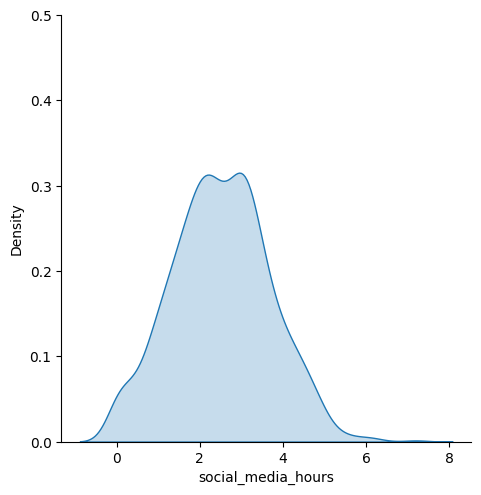

In [5]:
sns.displot(data = data, x= 'social_media_hours', kind = 'kde', fill = True)
##This can be done using // sns.kdeplot(data = data, x = 'social_media_hours', fill = True)
plt.ylim(0,0.5)
plt.show()

### Since there is visual confusion whether to decide it is normal or not we use the other test named 

---

### 2. Shapiro test (Shapiro wilk test)
### This test gives the p value and if the pValue is >= 0.05 it is normally distributed else it is not normally distributed
### Library to import: shapiro from scipy.stats

In [6]:
stats, pValue = shapiro(data['social_media_hours'])
print(pValue) ## pvalue <= 0.05 which means it is not normal 

0.000727508869674786


---

### QQ plot (Quantile - Quantile Plot )
### The QQ plot is a graphical tool to compare the distribution of your data vs theoritical distribution (which is usually normal)
### Libraries to import from statsmodels.graphics.gofplots import qqplot

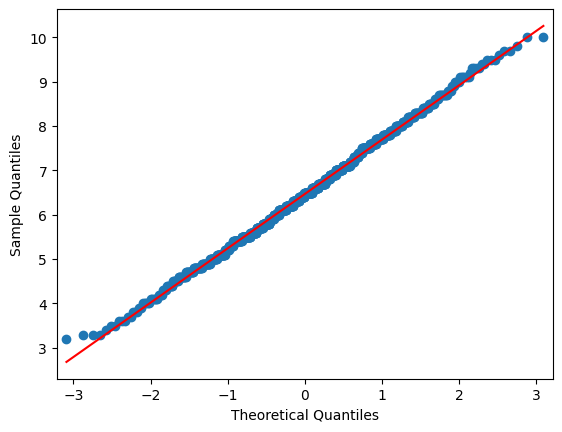

In [7]:
qqplot(data['sleep_hours'], line = 's') ##line = 's' means the standarized line
plt.show()


### Since most of the dots are aligned to the theoritical line or the normally distributed line we can hence conclude the sleep_hours column is normally distributed !

---

### Anderson- Darling Test 
### Anderson -Darling test is one of the detailed version of the shapiro walk test. It is usually done if you have a larger dataset and if you need more precise value. To conclude, it is also the test to distinguish normality but in more detailed and standarized way!
### Libraries to use : from scipy.stats import anderson 

In [8]:
result = anderson(data['social_media_hours'], dist = 'norm')
print(f"Test statistic: {round(result.statistic, 4)}")
print(f"Significance Levels: {result.significance_level}")
print(f"Critical Values: {result.critical_values}")

Test statistic: 0.7138
Significance Levels: [15.  10.   5.   2.5  1. ]
Critical Values: [0.574 0.653 0.784 0.914 1.088]


### How to interpret the result of the Anderson-Darling Test
### Usually the test statistic can be taken as the (pValue) whereas teh critical values can be taken as the significance value at certain significane level. In significance level teh 15 is the 15% level and 10 is the 10% level. Most commonly the significance level is set for 5% to 1% of the data. In this contxt 5% to 1% has three values [.784,.914,1.088] which are all greater than the pValue or the test statistic i.e. 0.7138. So we can prove that our data is normal !

---

### Blocking in Experimental Design 
### Blocking refers to the grouping in the experimental design to avoid the influence of the variablitiy. It is done using oneway ANOVA testing 
### Libraries used: from scipy.stats import f_oneway

In [9]:
### Lets see how does diet quality affect as per the exercise frequency 
internetFrequency = data.groupby('internet_quality').apply(
    lambda x: x.sample(frac = 1)
)

internetFrequency = internetFrequency.reset_index(drop = True)

internetFrequencyAnova = internetFrequency.groupby('internet_quality').apply(
    lambda x: f_oneway(
        x[x['diet_quality']== 'Fair']['exercise_frequency'],
        x[x['diet_quality']== 'Poor']['exercise_frequency'],
        x[x['diet_quality']== 'Good']['exercise_frequency'],
    )
)

print(internetFrequencyAnova)

internet_quality
Average     (2.5932843092007647, 0.0760697612999077)
Good       (0.09640777375602799, 0.9081126480482682)
Poor        (0.5415398029624701, 0.5829209461667928)
dtype: object


/var/folders/bt/9_3kc80d4jq8sv8fv_c7d_fr0000gn/T/ipykernel_90714/1286184476.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  internetFrequency = data.groupby('internet_quality').apply(
/var/folders/bt/9_3kc80d4jq8sv8fv_c7d_fr0000gn/T/ipykernel_90714/1286184476.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  internetFrequencyAnova = internetFrequency.groupby('internet_quality').apply(


### So what we did is: We groupped the internet_quality and then in the internet quality in each of the quality we checked the exercise frequency influenced by the diet_quality! So it is like in every internet_quality , and in every diet_quality of the internet_quality check the exercise frequency ! If the mean of the exercise frequency are same or not ?
### In other words, we're asking:
### "Does the mean exercise frequency differ across diet quality groups, depending on the level of internet quality?"

### **It is like asking in certain internet level is there impact of the diet quality in the exercise frequency ?**

---

### Covariate 
### Covariate is not the main treatment but still might affect the whole outcome 
### For example if we are checking the diet quality and the exercise frequency then the age is the covariate because age can put the effect in the diet more older more strict diet 

### Confounder 
### Confounder is the variable that influences the both the treatment and the outcome, and creates the false relationship between them. 
### For example: If you want to study if icecream causes drowning or not ,but,  it might seem it has no relation, the confounder temperature is the real deal where people tend to swim more when the weather is hot and also tend to eat more icecreams 

---

### Independent Ttest 
### Does student with part time job and without part time job have different test scores ? 
### Columns -> part_time_job vs exam_score
### Test used -> Independent t-test (Because only two groups)

In [11]:
from scipy.stats import ttest_ind
genderStudy = data[['part_time_job','exam_score']]
partTimeYes = data[data['part_time_job'] == 'Yes']['exam_score']
partTimeNo = data[data['part_time_job'] == 'No']['exam_score']
t_stat, p_value = ttest_ind(partTimeYes, partTimeNo)
print(p_value)



0.4006113244264293


---

### ANVOA Test 
### Does diet quality affect in the exercise frequency 
### Columns -> diet_quality vs exercise_frequency 
### Test used -> f_oneway anova test 


In [12]:
dietandexercise = data[['diet_quality','exercise_frequency']]
diet_levels = dietandexercise['diet_quality'].dropna().unique()

groups = [dietandexercise[dietandexercise['diet_quality'] == level]['exercise_frequency'] for level in diet_levels]
f_stat, p_val = f_oneway(*groups)
print(p_val)


# There is no statistically significant evidence that diet quality affects exercise frequency.

0.442902689963265


---


### Since we have figured out that the mean between the diet_quality and their respective exercise frequency is not same! Let's figure out exactly which groups are not same 
### Test used: pairwise_tukeyhsd (from statsmodels.stats.multicomp import pairwise_tukeyhsd)
### Used to see which groups are not performing or which group has uneven means 

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(
    data['exercise_frequency'],
    data['diet_quality'],
    alpha = 0.05
)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  Fair   Good   0.1562 0.5159 -0.1778 0.4902  False
  Fair   Poor   0.1801 0.5685  -0.237 0.5972  False
  Good   Poor   0.0239 0.9905 -0.4027 0.4506  False
---------------------------------------------------


### Since all of the value of the group in reject column are False, we can conclude that even there is difference in the mean, there is not any statistically difference is any of the group's means

---


### Chi2_contigency test 
### Is there relationship between gender and part_time_job
### Used method chi2_contigency 


In [13]:
from scipy.stats import chi2_contingency
genderpart = pd.crosstab(data['gender'],data['part_time_job'])
stats,pValue,dof, exp = chi2_contingency(genderpart)
print(pValue)


##p > 0.05 The values are likely independent !

0.5153081349950721


---

### P-Values, Alpha and Erros 

### P-Values are the probability of observing our data if the null hypothesis were true 
### Alpha is the threshold or the significane, usually pValue <= alpha


---

### Type I Error and Type II Error 

### When you reject the hypothesis stating there is difference or p > 0.05 but in reality there is not any difference, This type of error are called (Type I errors) (False Positive)
### When you think it is right but in reality it is wrong, then this type of errors are called type II erros. (False Negative)

---